<h1>Case 1. Heart Disease Classification</H1><br>
Cognitive Systems for Health Technology Applications, Spring 2018<br>
2.2.2018<br>
Viljami Koho<br>
Helsinki Metropolia University of Applied Sciences<br>

# 1. Objectives

In [585]:
# Tehtävän tavoitteena oli luoda ohjelma, jonka avulla pystytään sanomaan onko henkilöllä sydänsairaus vai ei.
# Mikäli ohjelma antoi output arvoksi 0 oli henkilö terve, jos arvoksi suuremman kuin 0 oli hänellä sydänsairaus. 
# Tehtävässä vaadittiin useamman tiedoston tarkastelua, jotka yhdistettiin yhdeksi datajoukoksi.
# Datajoukon käsittelyn ja tyhjien arvojen korjauksen jälkeen normalisoitiin data ja valittiin tutkittavat sarakkeet.
# Tämän jälkeen luotiin ja määriteltiin verkko. Datajoukosta 80% valittiin trainingiin ja 20% testaukseen.
# Lopulta verkon tarkkuutta piti myös arvioida, ja tarkkuudeksi saatiin ~70 prosenttia. 

# 2. Required libraries

In [586]:
# Import libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Data description and preprocessing

In [587]:
# Location of the dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename1 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename2 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename3 = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

In [588]:
# column names for the data
colnames = 'age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'

In [589]:
# Read data to data frame (4 files)
df1 = pd.read_csv(filename,
                 names = colnames,
                 na_values = '?')

df2 = pd.read_csv(filename1,
                 names = colnames,
                 na_values = '?')

df3 = pd.read_csv(filename2,
                 names = colnames,
                 na_values = '?')

df4 = pd.read_csv(filename3,
                 names = colnames,
                 na_values = '?')

# Read the data into the same data frame
frames = [df1, df2, df3, df4]
df = pd.concat(frames)
df.index = range(920)
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [590]:
# Descriptive statistics; Mean, min and max values
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


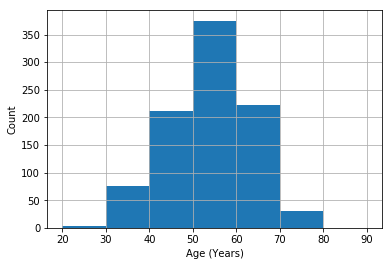

In [591]:
# Making the age histogram
df['age'].hist(bins = np.arange(20, 100, 10))
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

In [592]:
# Replace missing values with mode
df = df.where(~np.isnan(df), df.mode(), axis = 'columns')
#df # Shows all values
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [593]:
# Output value: 0 = normal, 0 or more = heart disease
# False = healthy
# True = heart disease

label = df['num'] > 0
label.head()

0    False
1     True
2     True
3    False
4    False
Name: num, dtype: bool

In [594]:
# Data normalization
df = (df - df.min())/(df.max() - df.min())
# df #df shows all values
df.head()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.714286,1.0,0.000000,0.725,0.386401,1.0,1.0,0.633803,0.0,0.556818,1.0,0.000000,0.75,0.00
1,0.795918,1.0,1.000000,0.800,0.474295,0.0,1.0,0.338028,1.0,0.465909,0.5,1.000000,0.00,0.50
2,0.795918,1.0,1.000000,0.600,0.379768,0.0,1.0,0.485915,1.0,0.590909,0.5,0.666667,1.00,0.25
3,0.183673,1.0,0.666667,0.650,0.414594,0.0,0.0,0.894366,0.0,0.693182,1.0,0.000000,0.00,0.00
4,0.265306,0.0,0.333333,0.650,0.338308,0.0,1.0,0.788732,0.0,0.454545,0.0,0.000000,0.00,0.00


In [595]:
# Selecting the columns
columns = ['age', 'sex', 'cp', 'tresbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal']
data = df[columns].values

In [596]:
ndata = 920 # Total number of samples

In [597]:
# Dividing the data for training and testing
ntrain = int(0.8*ndata) # 80% for training, 20% for testing
train_data = data[:ntrain]
train_label = label[:ntrain]
test_data = data[ntrain:]
test_label = label[ntrain:]

# 4. Modeling and compilation

In [598]:
# Define the architecture of the network
from keras import models, layers
from keras import Sequential

network = models.Sequential()
network.add(layers.Dense(15, activation ='relu', input_shape=(13, )))
network.add(layers.Dense(15, activation ='relu'))
network.add(layers.Dense(1, activation ='sigmoid')) # Ensures output is in

In [599]:
# Compile the network
network.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

# 5. Training and Testing

In [600]:
# Train the network
network.fit(train_data, train_label, epochs = 100, batch_size = 100, verbose = 0)

# 6. Evaluation, Results and Discussion

In [601]:
# Testing the trained network
test_loss, test_acc = network.evaluate(test_data, test_label)
print('test_acc', test_acc)

184/184 [==============================] - 2s 9ms/step
test_acc 0.695652173913


In [602]:
# Tarkkuudeksi (test_acc) saatiin ~70 prosenttia, johon olen melko tyytyväinen näillä taidoilla.
# Tarkkuus on parempi kuin heitettäessä kolikkoa, josta tulee joko kruuna tai klaava ("50%/50%").
# Tarkkuudessa vielä parantamisen varaa.

# 7. Conclusions

In [603]:
# Verkko toimii ja pystyy määrittämään sydänsairauden n.70 prosentin tarkkuudella. 
# Näillä taidoilla en pysty tällä hetkellä parempaan. Olen kuitenkin tyytyväinen tulokseen.
# Kurssin lopussa olisi mukavaa pystyä toteuttamaan verkko, jolla pystyttäisiin saavuttamaan vieläkin tarkempia tuloksia. 